In [1]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "/Users/jacksullivan/Desktop/CS/CS284A/284aProj")

# from latent_3d_points.src.point_net_ae import PointNetAutoEncoder
# from latent_3d_points.src.autoencoder import Configuration as Conf
# from latent_3d_points.src.neural_net import MODEL_SAVER_ID

from latent_3d_points.src.in_out import snc_category_to_synth_id, create_dir, PointCloudDataSet, \
                                        load_all_point_clouds_under_folder

from latent_3d_points.src.general_utils import plot_3d_point_cloud
# from latent_3d_points.src.tf_utils import reset_tf_graph

# from latent_3d_points.src.vanilla_gan import Vanilla_GAN
# from latent_3d_points.src.w_gan_gp import W_GAN_GP
# from latent_3d_points.src.generators_discriminators import latent_code_discriminator_two_layers,\
# latent_code_generator_two_layers

In [12]:
class_name = raw_input('Give me the class name (e.g. "chair"): ').lower()

Give me the class name (e.g. "chair"): chair


In [13]:
top_in_dir = '../data/shape_net_core_uniform_samples_2048/'    

ae_configuration = '../data/single_class_ae/configuration'
syn_id = snc_category_to_synth_id()[class_name]
class_dir = osp.join(top_in_dir , syn_id)
all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)

6778 pclouds were loaded. They belong in 1 shape-classes.


In [21]:
from sklearn.cluster import KMeans

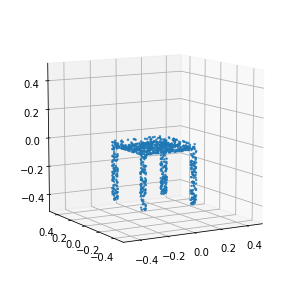

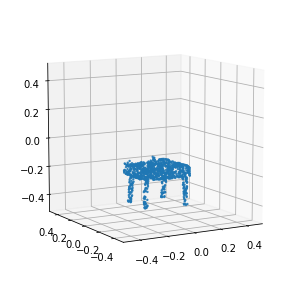

In [18]:
L = all_pc_data.next_batch(21)
L= L[0]
i = 0
plot_3d_point_cloud(L[i][:1000, 0], L[i][:1000, 1], L[i][:1000, 2], in_u_sphere=True);
i = 20
plot_3d_point_cloud(L[i][:1000, 0], L[i][:1000, 1], L[i][:1000, 2], in_u_sphere=True);

In [27]:
kmeans = KMeans(n_clusters=6).fit(L[0])
kmeans.labels_

array([1, 4, 1, ..., 0, 0, 0], dtype=int32)

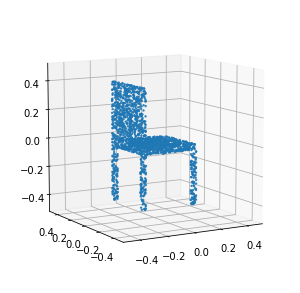

In [31]:
l1 = L[0][kmeans.labels_!=2]
plot_3d_point_cloud(l1[:, 0], l1[:, 1], l1[:, 2], in_u_sphere=True);